<a href="https://colab.research.google.com/github/6HaneenAlghamdi/Masar-Final-Project/blob/main/Masar_Final_Project_Haneen_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Haneen Alghamdi


Sleep health and lifestyle Dataset


predicting Sleep Disorders using ML model



```
The Sleep Health and Lifestyle Dataset comprises 400 rows and 13 columns, covering a wide range of variables related to sleep and daily habits.

It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category,
blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

The source: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data.
```



# 1- Data Cleaning

In [ ]:
# Import libraries
import pandas as pd
import numpy as np

# Read data from CSV file
df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
#Check data types
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [ ]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [ ]:
df["BMI Category"] = df["BMI Category"].replace({'Normal' : 'Normal Weight'})

df["BMI Category"].unique()

array(['Overweight', 'Normal Weight', 'Obese'], dtype=object)

In [ ]:
# Check for missing values
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [ ]:
# Check for duplicate rows
df.duplicated().sum()

0

In [ ]:
# Check for outliers
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [ ]:
# Check for inconsistencies
print(df.value_counts())

Person ID  Gender  Age  Occupation         Sleep Duration  Quality of Sleep  Physical Activity Level  Stress Level  BMI Category   Blood Pressure  Heart Rate  Daily Steps  Sleep Disorder
1          Male    27   Software Engineer  6.1             6                 42                       6             Overweight     126/83          77          4200         None              1
247        Male    44   Salesperson        6.3             6                 45                       7             Overweight     130/85          72          6000         Insomnia          1
256        Female  45   Teacher            6.5             7                 45                       4             Overweight     135/90          65          6000         Insomnia          1
255        Female  45   Teacher            6.5             7                 45                       4             Overweight     135/90          65          6000         Insomnia          1
254        Female  45   Teacher            6.

#2-Data Processing

In [ ]:
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [ ]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

In [ ]:
systolic_avg = df['Systolic'].mean()
diastolic_avg = df['Diastolic'].mean()
print(f"Average Systolic Pressure: {systolic_avg}")
print(f"Average Diastolic Pressure: {diastolic_avg}")

Average Systolic Pressure: 128.55347593582889
Average Diastolic Pressure: 84.64973262032086


In [ ]:
df.drop(['Blood Pressure',], axis = 1, inplace=True)
df.drop(["Person ID"], axis = 1,inplace=True)

In [ ]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal Weight,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal Weight,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


#3-Data Visulization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

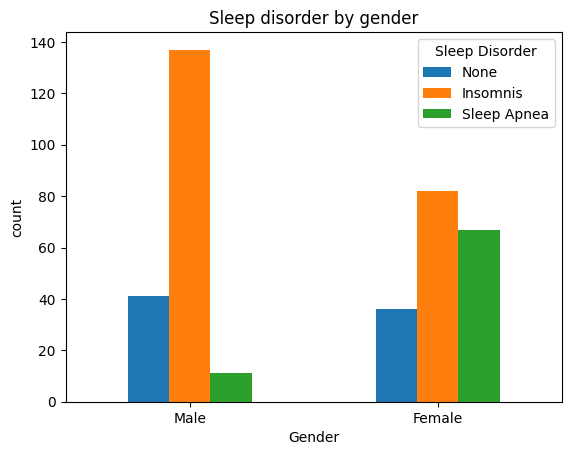

In [ ]:
#Sleep diorder based on gender
grouped_data = df.groupby(["Gender","Sleep Disorder"]).size().unstack()

grouped_data= grouped_data.reindex(["Male","Female"])

grouped_data.plot(kind="bar",stacked=False)

plt.title('Sleep disorder by gender')
plt.xlabel('Gender')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.legend(title="Sleep Disorder",labels = ["None","Insomnis","Sleep Apnea"])

plt.show()


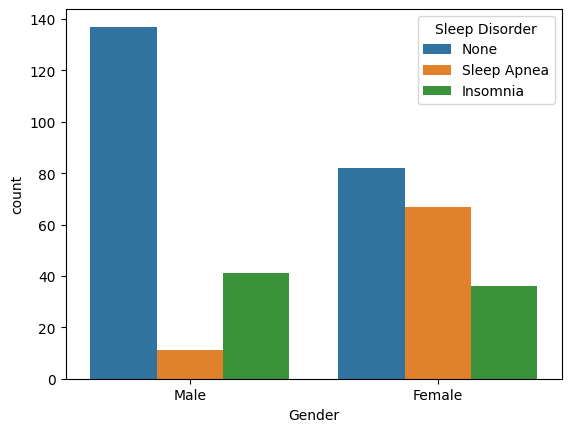

In [ ]:
#Sleep disorder based on gender
sns.countplot(x = "Gender", hue = "Sleep Disorder", data = df);

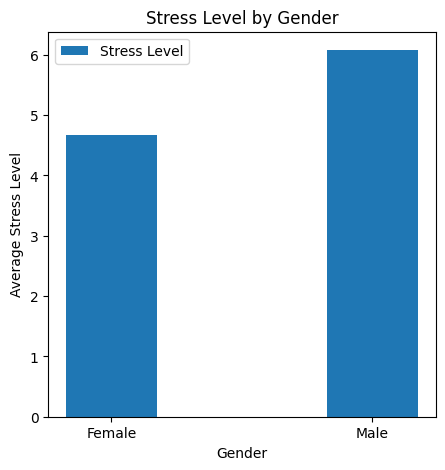

In [ ]:
#stress level by gender

gender_stress = df.groupby('Gender')['Stress Level'].mean()
x = np.arange(len(gender_stress))
width = 0.35
plt.figure(figsize=(5, 5))
plt.bar(x, gender_stress, width, label='Stress Level')
plt.xlabel('Gender')
plt.ylabel('Average Stress Level')
plt.title('Stress Level by Gender')
plt.xticks(x, gender_stress.index)
plt.legend()
plt.show()





<ipython-input-21-b585cba1072d>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Occupation", y="Daily Steps", data=df, ci=None)


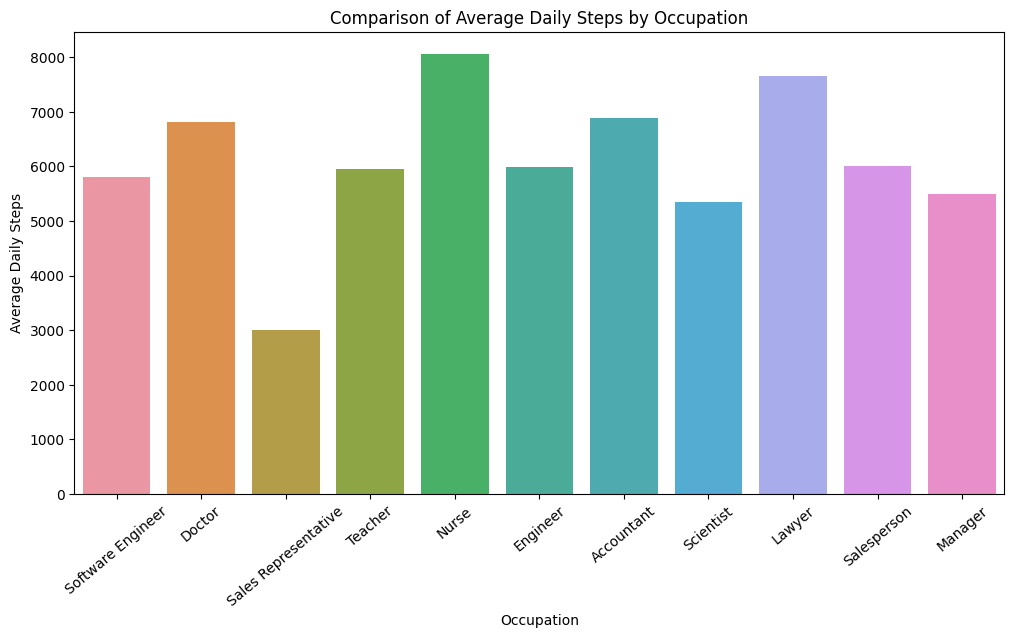

In [ ]:
#Occupation vs Daily steps taken
plt.figure(figsize=(12, 6))
sns.barplot(x="Occupation", y="Daily Steps", data=df, ci=None)
plt.title("Comparison of Average Daily Steps by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Average Daily Steps")
plt.xticks(rotation=40)
plt.show()

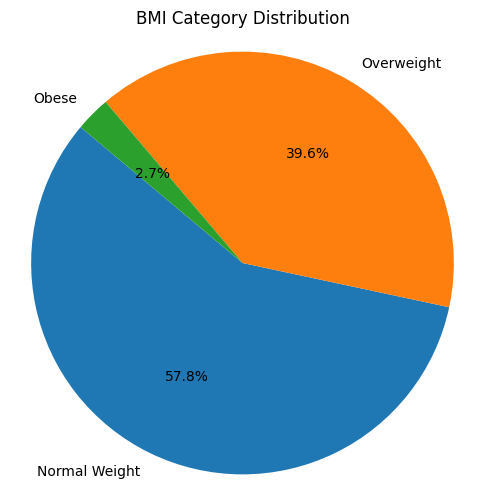

In [ ]:
#BMI Category Distribution
bmi_counts = df['BMI Category'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(bmi_counts, labels=bmi_counts.index,autopct='%1.1f%%', startangle=140)
plt.title("BMI Category Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

#4-ML Model

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder #for normalization
from sklearn import datasets
from sklearn.metrics import accuracy_score


In [ ]:
df.shape

(374, 13)

In [ ]:
df.dtypes

Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
Systolic                     int64
Diastolic                    int64
dtype: object

In [ ]:
df['Sleep Disorder'].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [ ]:
df["Sleep Disorder"].value_counts() #Target column

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

In [ ]:
#create a new column for binary values. (Target column)

# 0----> None
# 1----> Presence of a sleep disorder

df['Sleep Disorder Binary'] = 0
for index, row in df.iterrows():
  if row['Sleep Disorder'] != "None":
    df.at[index,'Sleep Disorder Binary'] = 1

df.drop(['Sleep Disorder'], axis = 1,inplace=True)



In [ ]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic,Diastolic,Sleep Disorder Binary
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,126,83,0
1,Male,28,Doctor,6.2,6,60,8,Normal Weight,75,10000,125,80,0
2,Male,28,Doctor,6.2,6,60,8,Normal Weight,75,10000,125,80,0
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140,90,1
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140,90,1


In [ ]:
#label encoding for object datatype
oe = OrdinalEncoder()
df[['Gender']]= oe.fit_transform(df[['Gender']])
df[['Occupation']]= oe.fit_transform(df[['Occupation']])
df[['BMI Category']]= oe.fit_transform(df[['BMI Category']])

In [ ]:
#split the data into features (x) and the target variable(y)
x = df.drop('Sleep Disorder Binary', axis=1)

y = df['Sleep Disorder Binary']

In [ ]:
#Standardize the numerical features

scaler = StandardScaler()
numerical_features = ['Age','Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level','Heart Rate','Daily Steps','Systolic','Diastolic']
x[numerical_features] = scaler.fit_transform(x[numerical_features])



In [ ]:
print(x)
print(y)

     Gender       Age  Occupation  Sleep Duration  Quality of Sleep  \
0       1.0 -1.753096         9.0       -1.298887         -1.098280   
1       1.0 -1.637643         1.0       -1.173036         -1.098280   
2       1.0 -1.637643         1.0       -1.173036         -1.098280   
3       1.0 -1.637643         6.0       -1.550588         -2.771424   
4       1.0 -1.637643         6.0       -1.550588         -2.771424   
..      ...       ...         ...             ...               ...   
369     0.0  1.941401         5.0        1.218127          1.411435   
370     0.0  1.941401         5.0        1.092276          1.411435   
371     0.0  1.941401         5.0        1.218127          1.411435   
372     0.0  1.941401         5.0        1.218127          1.411435   
373     0.0  1.941401         5.0        1.218127          1.411435   

     Physical Activity Level  Stress Level  BMI Category  Heart Rate  \
0                  -0.825418      0.347021           2.0    1.654719   
1  

In [ ]:
#train test split
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify = y, random_state=42)

In [ ]:
print(x.shape, X_train.shape, X_test.shape)

(374, 12) (299, 12) (75, 12)


In [ ]:
#training the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Evaluate the model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy )


Accuracy: 0.8933333333333333


In [ ]:
#Make prediction
new_inputs = pd.DataFrame({
    'Gender':[0], #0 = Male, 1 = Female
    'Age':[28],
    'Occupation':[0], #0 = Software Engineer, 1 = Doctor, 2 = Sales representative, 3 = Teacher, 4 = Nurse, 5 = Engineer, 6 = Accountant, 7 = Scientist, 8 = Lawyer, 9 = Salesperson, 10 = Manager.
    'Sleep Duration':[5.9],
    'Quality of Sleep':[4],
    'Physical Activity Level':[30],
    'Stress Level':[8],
    'BMI Category':[2], #0 = Overweight, 1 = Normal weight, 2 = Obese
    'Heart Rate':[85],
    'Daily Steps':[3000],
    'Systolic':[140],
    'Diastolic':[90]
})

new_inputs[numerical_features]= scaler.transform(new_inputs[numerical_features])

predictions = model.predict(new_inputs)

print(predictions)

# 0-----> None
# 1-----> Presence of a sleep disorder(Insomnia or Sleep Apnea)

[1]
